In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.metrics import mean_squared_error, r2_score

plt.style.use('ggplot')

In [2]:
okun = pd.read_excel('okun.xls')

In [3]:
okun.head()

gnp        un
0  1626.4  3.733333
1  1655.5  3.666667
2  1665.1  3.766667
3  1669.0  3.833333
4  1643.8  4.666667

In [4]:
okun['%change_un'] = okun['un'].pct_change()
okun['%change_gnp'] = okun['gnp'].pct_change()

okun = okun.dropna()

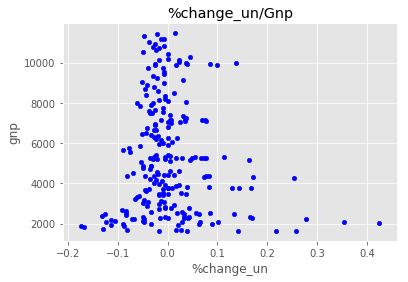

In [5]:
okun.plot.scatter('%change_un', 'gnp', c='b')
plt.title('%change_un/Gnp')
plt.show()

In [6]:
linreg = LinReg(fit_intercept=True, normalize=False)
linreg.fit(okun['%change_un'].values.reshape(-1, 1), 
           okun['%change_gnp'].values.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
print('coeff: {0}; intercept: {1}'.format(str(linreg.coef_[0, 0]), str(linreg.intercept_[0])))

coeff: -0.09056450628931012; intercept: 0.00875391724543107


In [8]:
linreg.score(okun['%change_un'].values.reshape(-1, 1), 
             okun['%change_gnp'].values.reshape(-1, 1))

0.4663650196032595

In [9]:
predicted_gnp = linreg.predict(okun['%change_un'].values.reshape(-1, 1))

In [10]:
print("Mean squared error: %.10f"
      % mean_squared_error(okun['%change_gnp'].values.reshape(-1, 1), predicted_gnp))

Mean squared error: 0.0000531199


In [11]:
print("Variance score: %.2f"
      % r2_score(okun['%change_gnp'].values.reshape(-1, 1), predicted_gnp))

Variance score: 0.47


In [12]:
coef = linreg.coef_[0, 0]
intercept = linreg.intercept_[0]

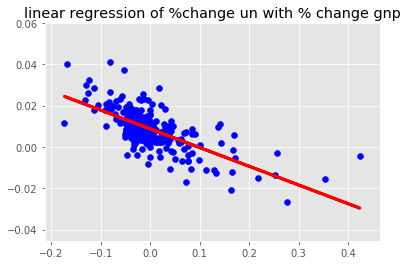

In [13]:
plt.scatter(okun['%change_un'], okun['%change_gnp'], c = 'b')
plt.plot(okun['%change_un'].values.reshape(-1, 1), predicted_gnp, color = 'red', linewidth = 3)
plt.title('linear regression of %change un with % change gnp')
plt.show()